In [7]:
# Import libraries and load the dataset and preapre for data visualization
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

In [9]:
# we will make sure every figure/plot that we get is also stored in the visuals folder
Path("../visuals").mkdir(parents=True, exist_ok=True)

In [10]:
# load our cleanned dataset
df = pd.read_csv("../data/cleaned/cleaned_dataset.csv")
df.shape

(9551, 13)

In [11]:
df.head()

,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes,Primary Cuisine,City_Freq
0,6,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,1,0,3,4.8,314,French,2
1,6,Makati City,121.014101,14.553708,Japanese,1200,1,0,3,4.5,591,Japanese,2
2,6,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,1,0,4,4.4,270,Seafood,4
3,6,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,0,0,4,4.9,365,Japanese,4
4,6,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,1,0,4,4.8,229,Japanese,4


save to ../visuals/rating_distribution_hist_kde.png


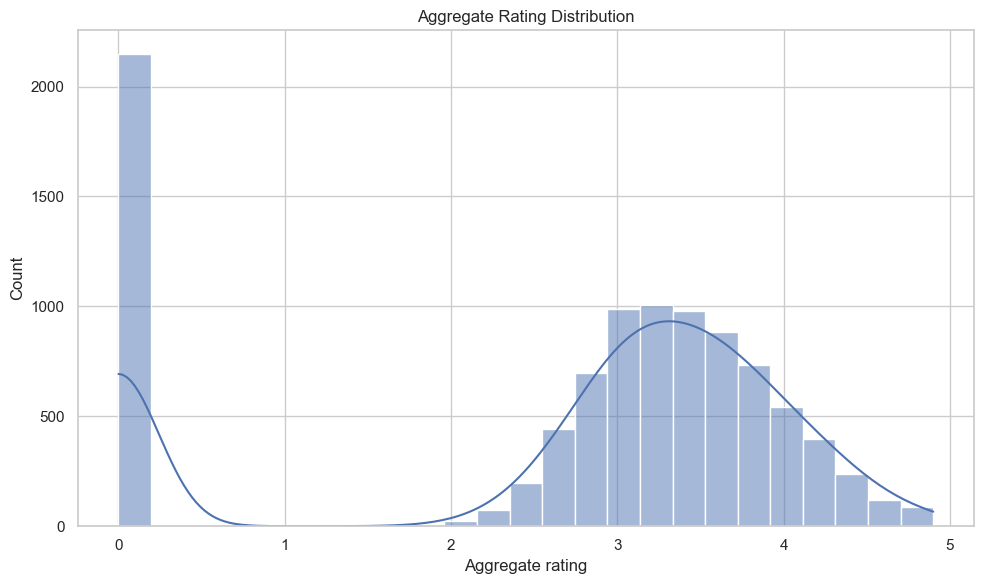

In [12]:
# Lets see How Rating is distributed
# Lets start with histogram
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(df["Aggregate rating"].dropna(), bins=25, kde = True, ax=ax)
ax.set_title("Aggregate Rating Distribution")
ax.set_xlabel("Aggregate rating")
ax.set_ylabel("Count")
plt.tight_layout()

# Now save the figure
fig_path = "../visuals/rating_distribution_hist_kde.png"
fig.savefig(fig_path, dpi=150)
print("save to", fig_path)

# display
plt.show()

saved to ../visuals/rating_boxplot.png


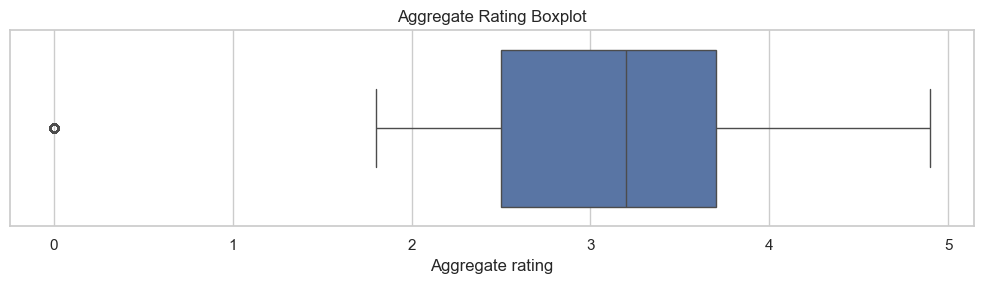

In [13]:
# Now Boxplot
fig, ax = plt.subplots(figsize=(10,3))
sns.boxplot(x=df["Aggregate rating"].dropna(), ax=ax)
ax.set_title("Aggregate Rating Boxplot")
plt.tight_layout()

# saving 
fig_path = "../visuals/rating_boxplot.png"
fig.savefig(fig_path, dpi=150)
print("saved to", fig_path)

# display
plt.show()

saved to:  ../visuals/rating_counts_bar.png


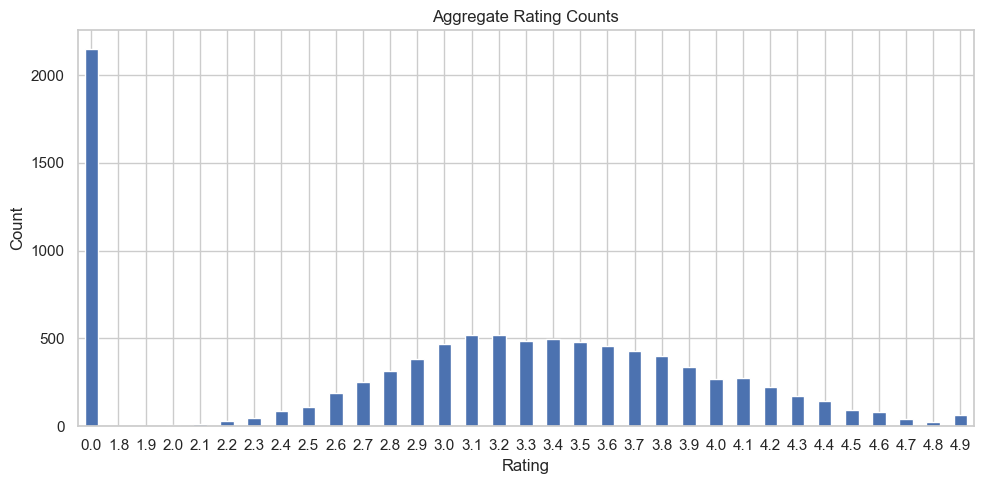

In [16]:
# Now bar chart
rating_counts = df["Aggregate rating"].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10,5))
rating_counts.plot(kind="bar", ax=ax)
ax.set_title("Aggregate Rating Counts")
ax.set_xlabel("Rating")
ax.set_ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()

# saving
fig_path = "../visuals/rating_counts_bar.png"
fig.savefig(fig_path, dpi=150)
print("saved to: ", fig_path)

# display
plt.show()

In [17]:
# In all the plots, we see there is a 0 rating being too much high, but in reality 0 rating is just "not rated/ no rating given"
# cause rating starts from 0 to 5, We have to handle this issue carefully as the number of "no rating given" are 2000+

Saved at:  ../visuals/cost_distribution_hist_kde.png


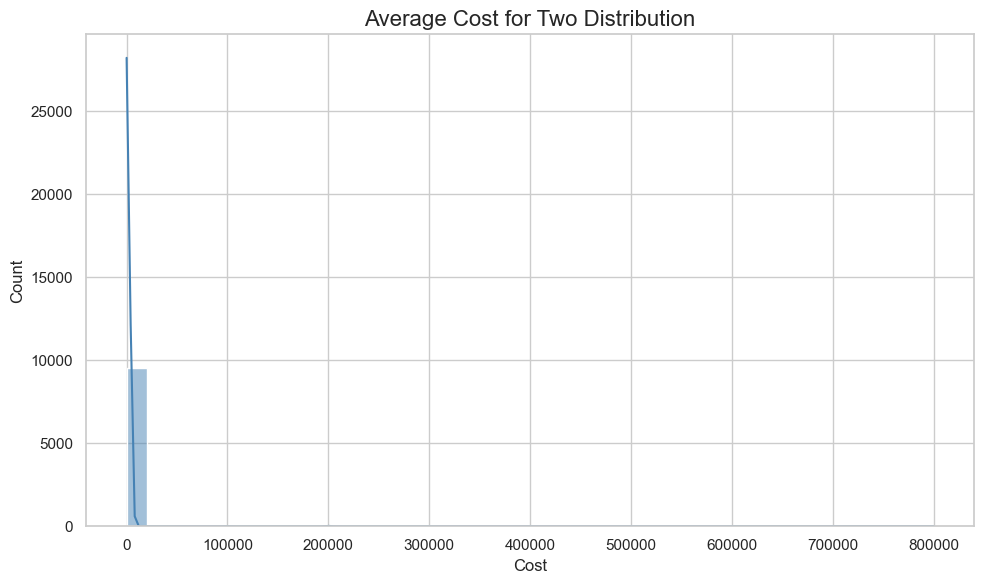

In [20]:
# Now lets see how Cost is distributed
# Lets start with histogram
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(df["Average Cost for two"], kde = True, bins = 40, ax=ax, color="steelblue")

ax.set_title("Average Cost for Two Distribution", fontsize = 16)
ax.set_xlabel("Cost")
ax.set_ylabel("Count")
plt.tight_layout()

# saving
fig_path = "../visuals/cost_distribution_hist_kde.png"
fig.savefig(fig_path, dpi=150)
print("Saved at: ", fig_path)

# display
plt.show()

Saved: ../visuals/cost_distribution_log_scaled.png


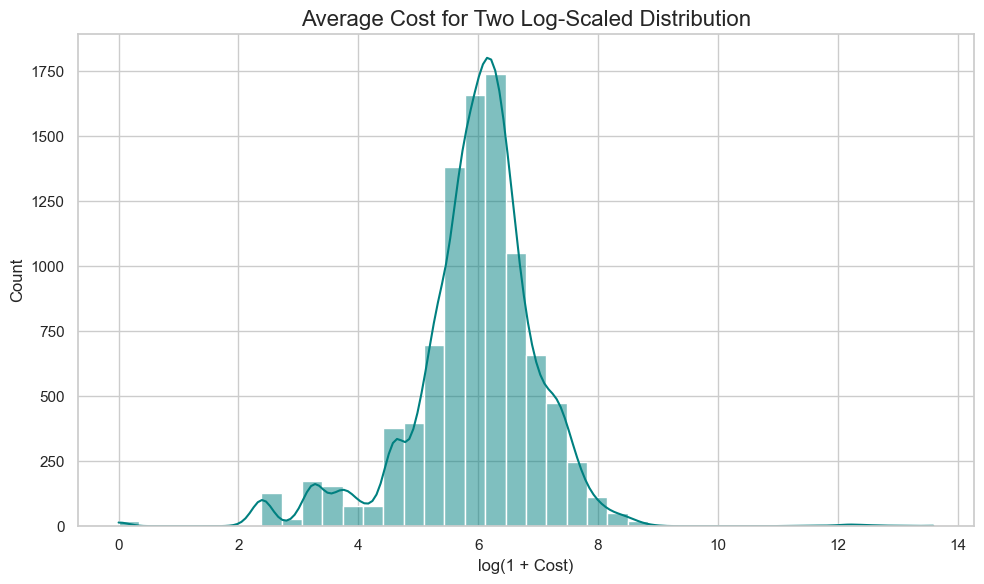

In [25]:
# If you observe the above histogram, we can see that the scale is too much one sided
# to solve this we will use a new scale with log transformation
fig, ax = plt.subplots(figsize = (10,6))

sns.histplot(
    np.log1p(df["Average Cost for two"]),
    bins=40,
    kde= True,
    color ="teal",
    ax=ax
)
ax.set_title("Average Cost for Two Log-Scaled Distribution", fontsize=16)
ax.set_xlabel("log(1 + Cost)")
ax.set_ylabel("Count")
plt.tight_layout()

# saving
fig_path = "../visuals/cost_distribution_log_scaled.png"
fig.savefig(fig_path, dpi=150)
print("Saved:", fig_path)

#display
plt.show()

Saved at: ../visuals/cost_boxplot.png


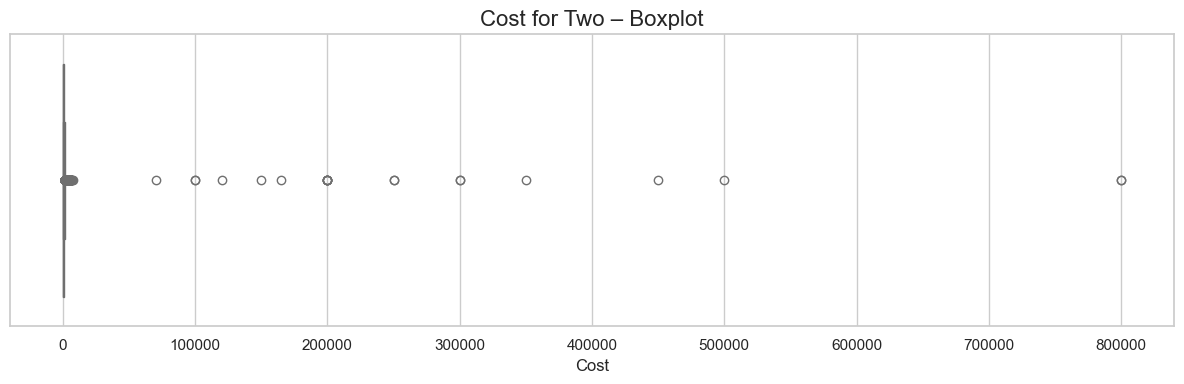

In [23]:
# Cost Boxplot
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x=df["Average Cost for two"], ax=ax, color="skyblue")

ax.set_title("Cost for Two – Boxplot", fontsize=16)
ax.set_xlabel("Cost")
plt.tight_layout()

# saving
fig_path = "../visuals/cost_boxplot.png"
fig.savefig(fig_path, dpi=150)
print("Saved at:", fig_path)

#display
plt.show()

Saved at:  ../visuals/votes_vs_rating.png


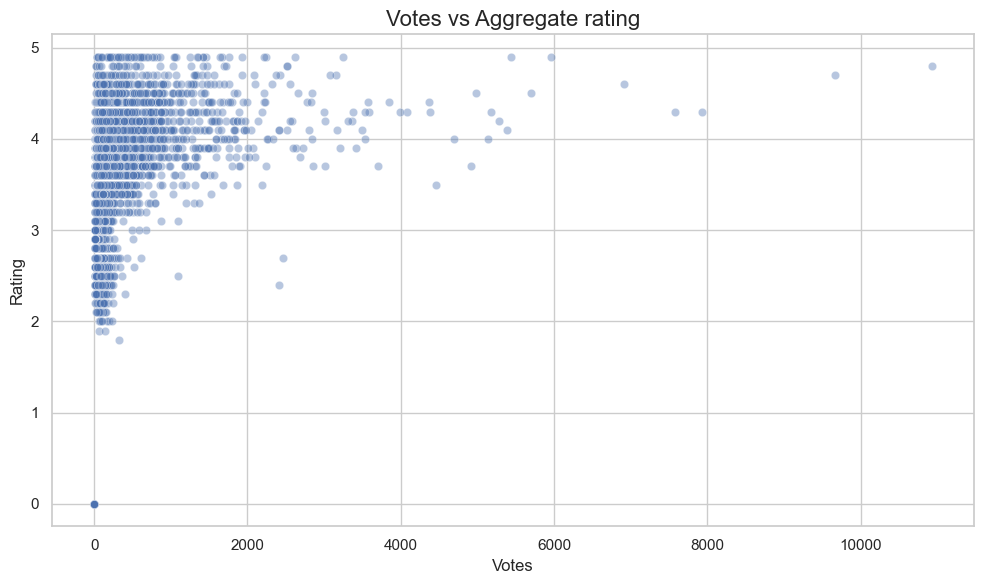

In [27]:
# Now we want do some plotting pased on votes and rating
# for that we will use scatter plot
# lets start with regular scatter plot
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="Votes",
    y="Aggregate rating",
    alpha=0.4
)

ax.set_title("Votes vs Aggregate rating", fontsize=16)
ax.set_xlabel("Votes")
ax.set_ylabel("Rating")

plt.tight_layout()

#saving
fig_path = "../visuals/votes_vs_rating.png"
fig.savefig(fig_path, dpi=150)
print("Saved at: ", fig_path)

#display 
plt.show()

Saved: ../visuals/votes_vs_rating_log.png


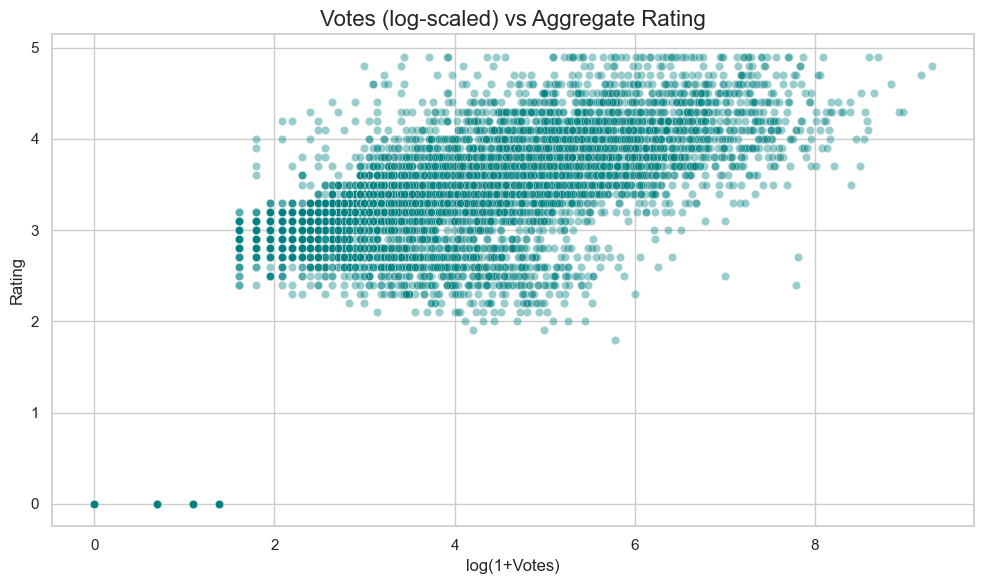

In [29]:
# Now we will see the log verion of this too
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x = np.log1p(df["Votes"]),
    y = df["Aggregate rating"],
    alpha = 0.4,
    color = "teal"
)

ax.set_title("Votes (log-scaled) vs Aggregate Rating", fontsize=16)
ax.set_xlabel("log(1+Votes)")
ax.set_ylabel("Rating")

plt.tight_layout()

# saving 
fig_path = "../visuals/votes_vs_rating_log.png"
fig.savefig(fig_path, dpi=150)
print("Saved:", fig_path)

# display
plt.show()

In [30]:
# We have discovered a proper coleration between higher rating and higer votes, 
# also found out most rating between 2.5 to 4 have recived avg to good votes

C:\Users\adars\AppData\Local\Temp\ipykernel_21312\764857624.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Saved: ../visuals/top_15_cuisines.png


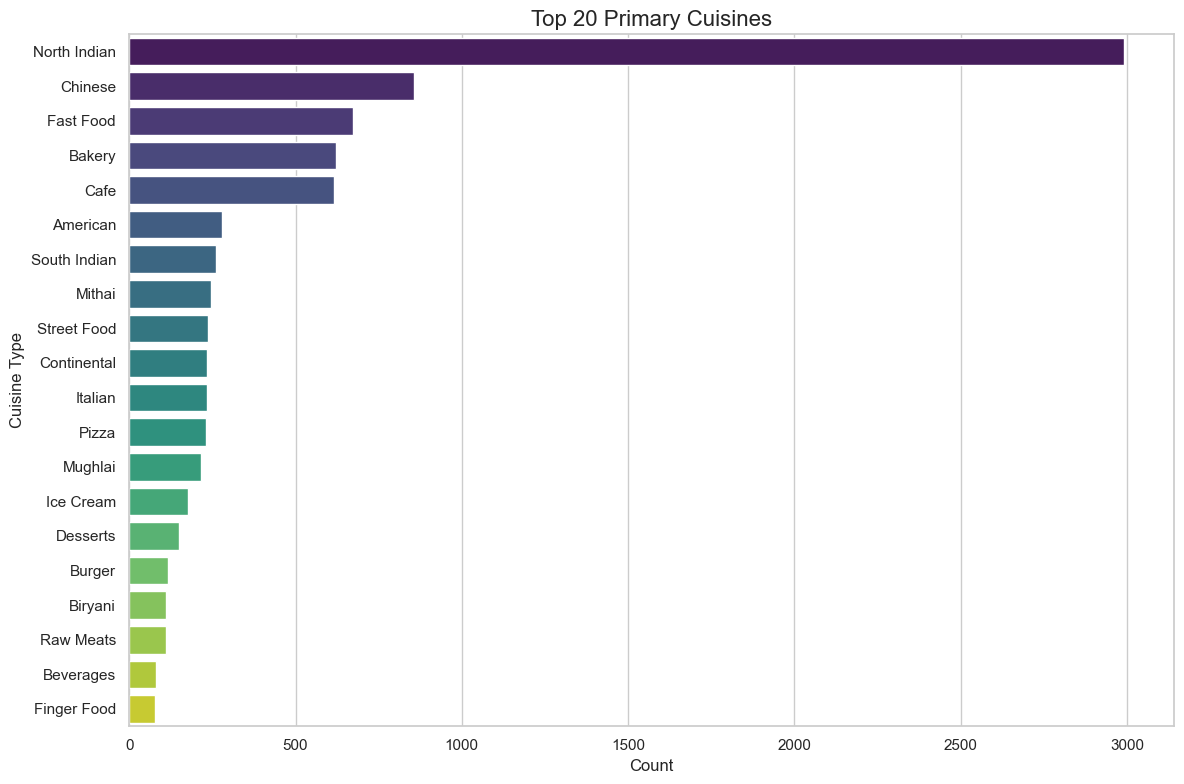

In [32]:
# Now its time for checking what Cuisine people perfor the most
# We will start with considering top 20 cusines

top_cuisines = df["Primary Cuisine"].value_counts().head(20)
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(
    x=top_cuisines.values,
    y=top_cuisines.index,
    orient='h',
    palette = "viridis",
    ax=ax
)

ax.set_title("Top 20 Primary Cuisines", fontsize=16)
ax.set_xlabel("Count")
ax.set_ylabel("Cuisine Type")

plt.tight_layout()

# saving
fig_path = "../visuals/top_15_cuisines.png"
fig.savefig(fig_path, dpi=150)
print("Saved:", fig_path)

# display
plt.show()

C:\Users\adars\AppData\Local\Temp\ipykernel_21312\1040911270.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\adars\AppData\Local\Temp\ipykernel_21312\1040911270.py:16: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\adars\AppData\Local\Temp\ipykernel_21312\1040911270.py:20: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  fig.savefig(fig_path, dpi=150)


Saved: ../visuals/top_20_cities.png


C:\Users\adars\OneDrive\Documents\Cognifyz-ML-Internship\test\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


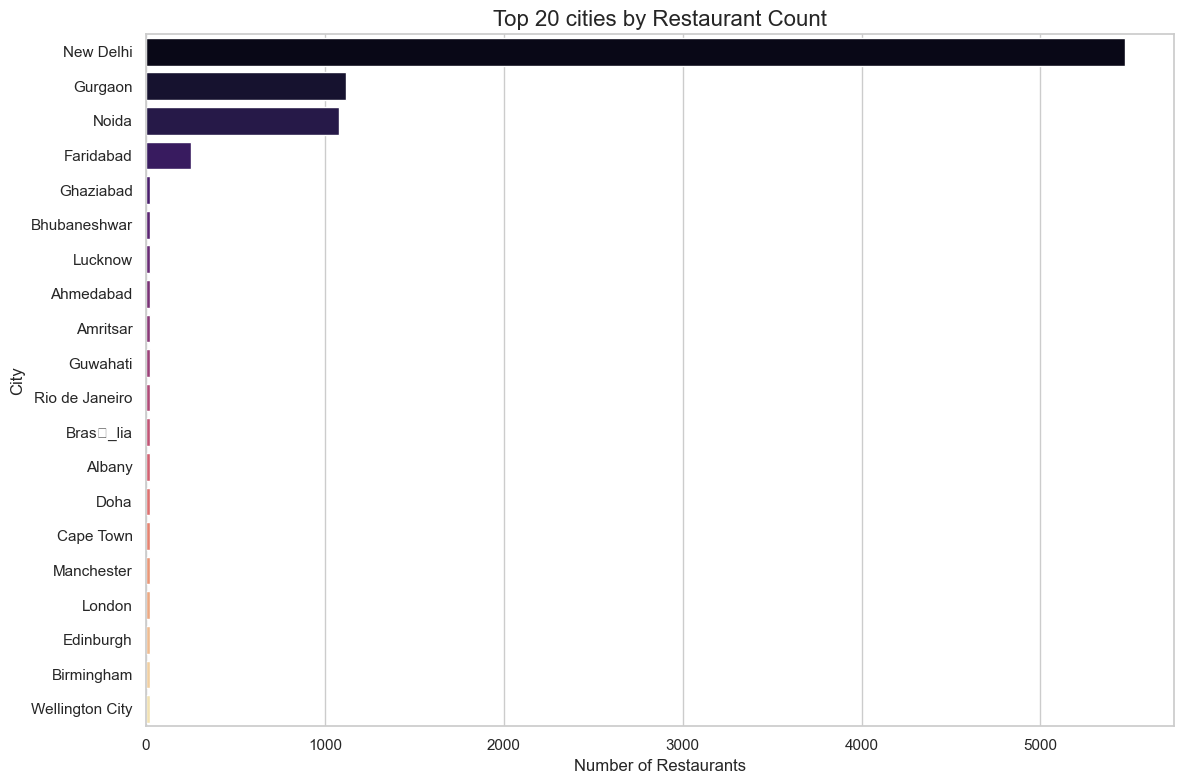

In [34]:
top_cities = df["City"].value_counts().head(20)

fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(
    x=top_cities.values,
    y=top_cities.index,
    orient='h',
    palette="magma",
    ax=ax
)

ax.set_title("Top 20 cities by Restaurant Count", fontsize=16)
ax.set_xlabel("Number of Restaurants")
ax.set_ylabel("City")
plt.tight_layout()

# saving
fig_path = "../visuals/top_20_cities.png"
fig.savefig(fig_path, dpi=150)
print("Saved:", fig_path)

# display
plt.show()

In [35]:
# From the above graph, we can see how much gap there is between New Delhi and other cities

In [36]:
# Now we will try to see the relationship of every value using heatmap
# first we will make sure we are only taking int and float values
numeric_col = df.select_dtypes(include=["int64", "float64"]) # you can check this by df.dtypes()
numeric_col.head()

,Country Code,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes,City_Freq
0,6,121.027535,14.565443,1100,1,0,3,4.8,314,2
1,6,121.014101,14.553708,1200,1,0,3,4.5,591,2
2,6,121.056831,14.581404,4000,1,0,4,4.4,270,4
3,6,121.056475,14.585318,1500,0,0,4,4.9,365,4
4,6,121.057508,14.584450,1500,1,0,4,4.8,229,4


In [37]:
# Get the correlation matrix
corr = numeric_col.corr()
corr

,Country Code,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes,City_Freq
Country Code,1.000000,-0.761689,0.087753,0.024954,-0.066261,-0.152391,0.213580,0.273718,0.155274,-0.416758
Longitude,-0.761689,1.000000,0.043207,0.045891,0.100488,0.178757,-0.078939,-0.116818,-0.085101,0.324007
Latitude,0.087753,0.043207,1.000000,-0.111088,0.054658,0.118722,-0.166688,0.000516,-0.022962,0.188570
Average Cost for two,0.024954,0.045891,-0.111088,1.000000,0.007758,-0.018974,0.075083,0.051792,0.067783,-0.051996
Has Table booking,-0.066261,0.100488,0.054658,0.007758,1.000000,0.101224,0.501925,0.189998,0.169422,0.043860
Has Online delivery,-0.152391,0.178757,0.118722,-0.018974,0.101224,1.000000,0.077918,0.225699,0.074303,0.068949
Price range,0.213580,-0.078939,-0.166688,0.075083,0.501925,0.077918,1.000000,0.437944,0.309444,-0.269632
Aggregate rating,0.273718,-0.116818,0.000516,0.051792,0.189998,0.225699,0.437944,1.000000,0.313691,-0.215611
Votes,0.155274,-0.085101,-0.022962,0.067783,0.169422,0.074303,0.309444,0.313691,1.000000,-0.141781
City_Freq,-0.416758,0.324007,0.188570,-0.051996,0.043860,0.068949,-0.269632,-0.215611,-0.141781,1.000000


Saved: ../visuals/correlation_heatmap.png


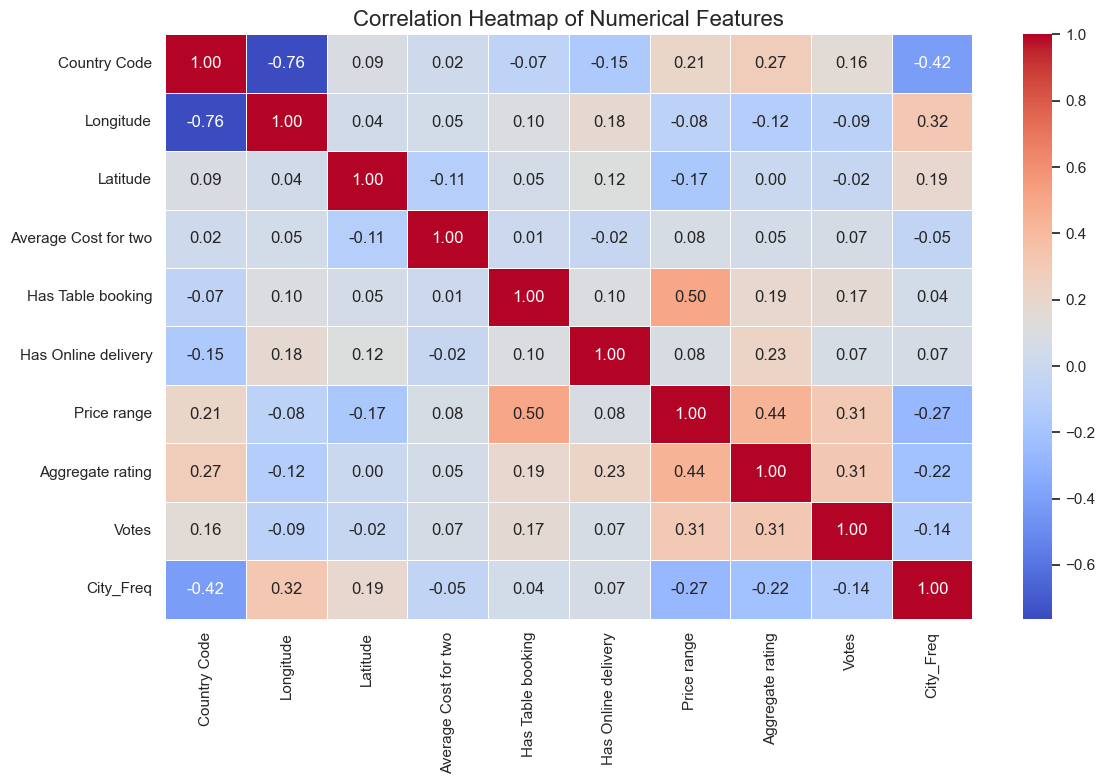

In [38]:
# Now we will plot heatmap using this
fig,ax= plt.subplots(figsize=(12,8))
sns.heatmap(
    corr,
    annot = True,
    cmap = "coolwarm",
    fmt = ".2f",
    linewidths=0.5,
    ax=ax
)
ax.set_title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.tight_layout()

# saving
fig_path = "../visuals/correlation_heatmap.png"
fig.savefig(fig_path, dpi=150)
print("Saved:", fig_path)

# display
plt.show()

In [ ]:
# We can see alot of correlations between data and we will use to train our model